#                           BASEBALL CASESTUDY

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success.There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

1.W -  the number of Wins 
2.R -  Runs scored 
3.AB -  At bat or time
4.H - This means Hit
5.2B - "two-base hit"
6.3B -  "three-base hit" 
7.HR -  Home runs 
8.BB -  Base on balls 
9.SO -  Strikeout
10.SB -  Stolen base 
11.RA -  Run Average 
12.ER -  Earned run 
13.ERA -  Earned Run Average 
14.CG - Complete Game 
15.SHO -  Shutout 
16.SV - Save 
17.E - means Errors  


 Output: Number of predicted wins (W)

In [144]:
#import necessary libararies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [145]:
#load the dataset
df=pd.read_csv('baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


This dataset contains 16 features which contains statistics summary of the Baseball players and the 'W' (wins) is the target variable which predicts the number of wins.

In [146]:
#first 5 records
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [147]:
#Last 5 records
df.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [148]:
#To know the shape of dataset
df.shape

(30, 17)

1.W - This indicates the number of Wins credited to a pitcher
2.R - This indicates Runs scored
3.AB - This means At bat or time at bat
4.H - This means Hit. It's also called a "base hit".
5.2B - two-bagger" or "two-base hit"
6.3B - This measns a Triple.A triple is sometimes called a "three-bagger" or "three-base hit"
7.HR - This means Home runs
8.BB - This means Base on balls (also called a "walk")
9.SO - Also denoted as "K" means Strikeout
10.SB - This means Stolen base
11.RA - This means Run Average
12.ER - This means Earned run
13.ERA - This means Earned Run Average
14.CG - This means Complete Game
15.SHO - This means Shutout 
16.SV - This means Save
17.E - This means Errors
-- Output: Number of predicted wins (W)

In [ ]:
#rename columns in dataset.

In [149]:
df.rename(columns={'W' : 'Wins', 
                   'R' : 'Runs Scored', 
                  'AB' : 'At Bat', 
                   'H' : 'Hits', 
                  '2B' : 'Doubles', 
                  '3B' : 'Triples',
                  'HR' : 'Home Runs', 
                  'BB' : 'Base on Balls', 
                  'SO' : 'Strike Outs', 
                  'SB' : 'Stolen Base',
                  'RA' : 'Runs Average', 
                  'ER' : 'Earned Runs', 
                 'ERA' : 'Earned Run Average', 
                  'CG' : 'Complete Game',
                 'SHO' : 'Shut Outs', 
                  'SV' : 'Saves', 
                   'E' : 'Errors'}, 
          inplace=True)

In [150]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wins                30 non-null     int64  
 1   Runs Scored         30 non-null     int64  
 2   At Bat              30 non-null     int64  
 3   Hits                30 non-null     int64  
 4   Doubles             30 non-null     int64  
 5   Triples             30 non-null     int64  
 6   Home Runs           30 non-null     int64  
 7   Base on Balls       30 non-null     int64  
 8   Strike Outs         30 non-null     int64  
 9   Stolen Base         30 non-null     int64  
 10  Runs Average        30 non-null     int64  
 11  Earned Runs         30 non-null     int64  
 12  Earned Run Average  30 non-null     float64
 13  Complete Game       30 non-null     int64  
 14  Shut Outs           30 non-null     int64  
 15  Saves               30 non-null     int64  
 16  Errors    

This datset has only numeric data and no column has categorical data.

<AxesSubplot:>

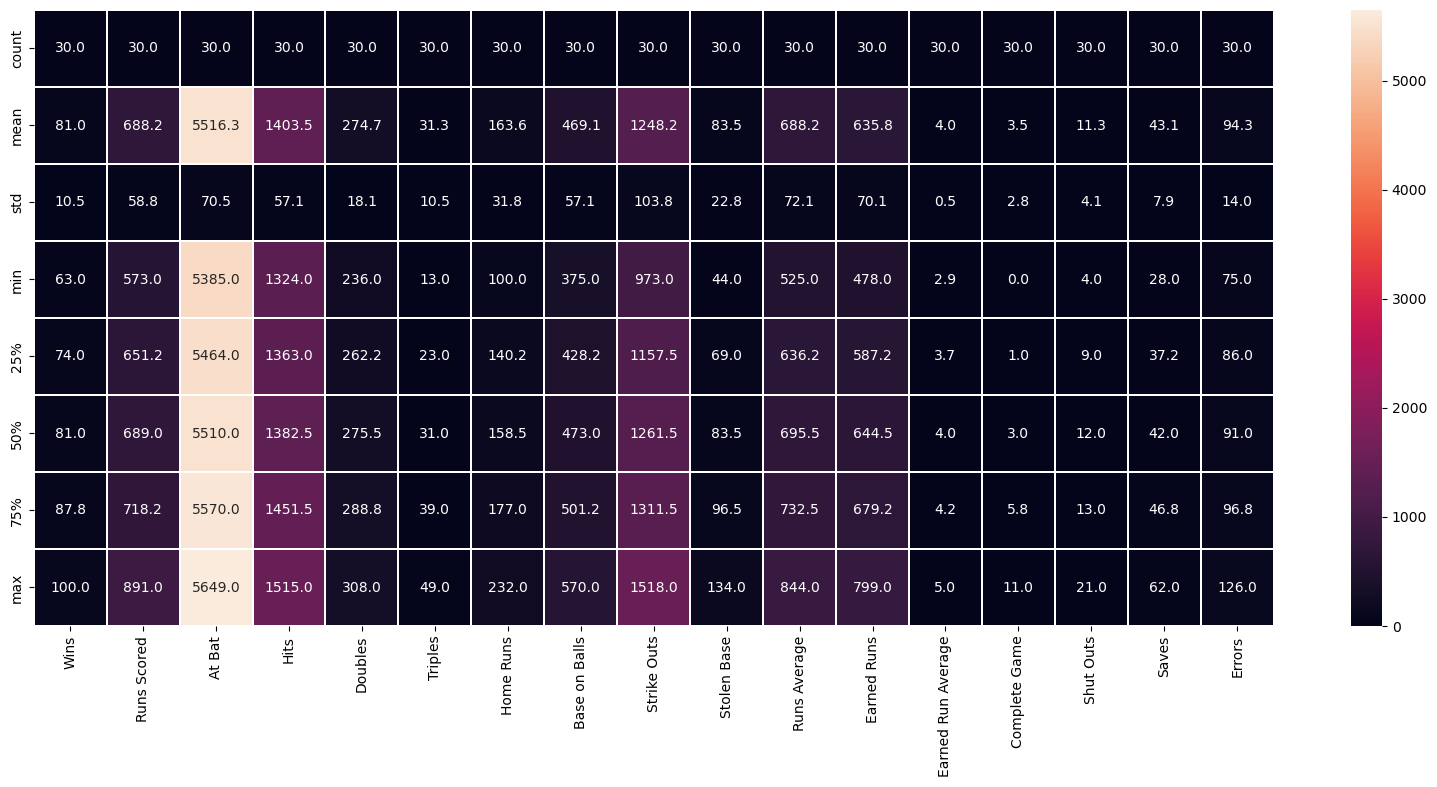

In [151]:
# Visualizing the statistics of the columns using heatmap.
plt.figure(figsize=(20,8))
sns.heatmap(df.describe(),linewidths = 0.1,fmt='0.1f',annot = True)

In [152]:
#to check null values present in the dataset
df.isnull().sum()

Wins                  0
Runs Scored           0
At Bat                0
Hits                  0
Doubles               0
Triples               0
Home Runs             0
Base on Balls         0
Strike Outs           0
Stolen Base           0
Runs Average          0
Earned Runs           0
Earned Run Average    0
Complete Game         0
Shut Outs             0
Saves                 0
Errors                0
dtype: int64

No null values presnt

In [153]:
#listing columns
df.columns.tolist()

['Wins',
 'Runs Scored',
 'At Bat',
 'Hits',
 'Doubles',
 'Triples',
 'Home Runs',
 'Base on Balls',
 'Strike Outs',
 'Stolen Base',
 'Runs Average',
 'Earned Runs',
 'Earned Run Average',
 'Complete Game',
 'Shut Outs',
 'Saves',
 'Errors']

In [154]:
df['Wins'].value_counts()

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: Wins, dtype: int64

In [155]:
#descriptive statistics (count,mean,min,max etc) 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Wins,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
Runs Scored,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
At Bat,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
Hits,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
Doubles,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
Triples,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
Home Runs,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
Base on Balls,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
Strike Outs,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
Stolen Base,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


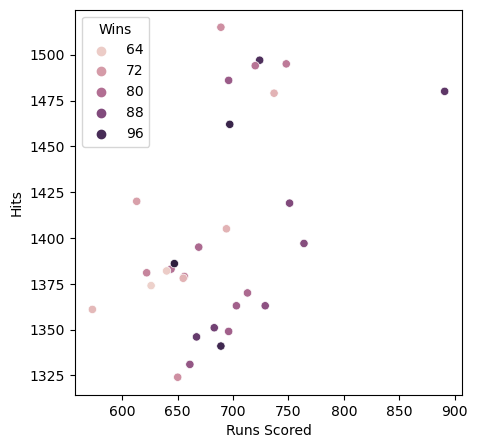

In [196]:
plt.figure(figsize=(5,5))
sns.scatterplot(df['Runs Scored'],df['Hits'],hue=df['Wins'])
plt.show()

Even if number of times ball hit bat is less than 1375 ,run in range of 650 to 750 contribute to win.


 less wining chance for runs less than 650 and no of hits less than 1325.

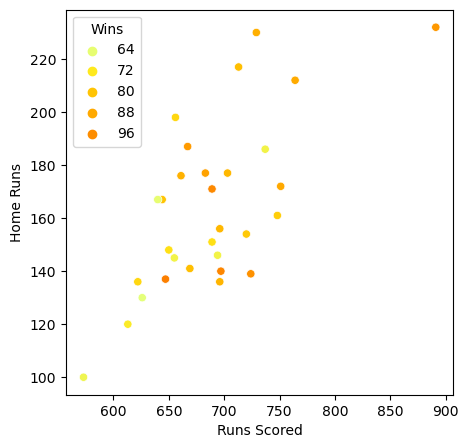

In [157]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='Runs Scored',y='Home Runs',hue='Wins',data=df,palette='Wistia')
plt.show()

Here, home runs(range of 140 & 180) lead to runs in range(650-750) increases the chances of win(90 %).
so keeping runs in this range.

Also some of the points have homeruns>200, wins are about 80%.Home runs is definitely contributing factor for team to win.

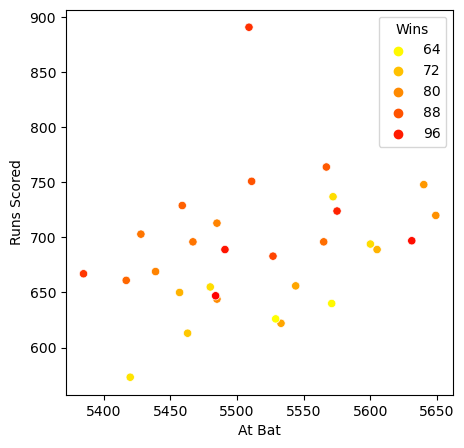

In [158]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='At Bat',y='Runs Scored',hue='Wins',data=df,palette='autumn_r')
plt.show()

At Bat andRuns Scored are positively related to each other.
 more Run Scored lead to more at bats.

In [159]:
df.corr()

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
Wins,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
Runs Scored,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
At Bat,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
Hits,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
Doubles,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
Triples,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
Home Runs,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
Base on Balls,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
Strike Outs,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
Stolen Base,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


In [160]:
df.skew()

Wins                  0.047089
Runs Scored           1.200786
At Bat                0.183437
Hits                  0.670254
Doubles              -0.230650
Triples               0.129502
Home Runs             0.516441
Base on Balls         0.158498
Strike Outs          -0.156065
Stolen Base           0.479893
Runs Average          0.045734
Earned Runs           0.058710
Earned Run Average    0.053331
Complete Game         0.736845
Shut Outs             0.565790
Saves                 0.657524
Errors                0.890132
dtype: float64

Text(0.5, 0, 'wins')

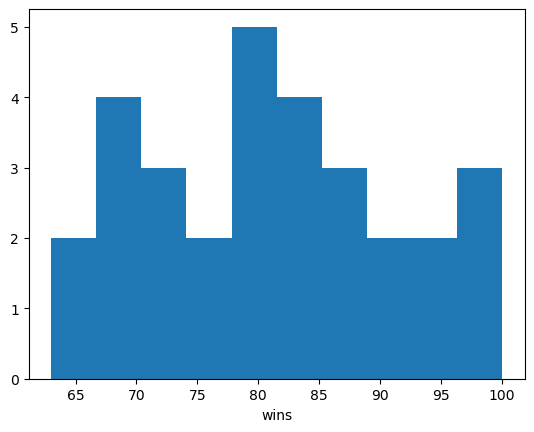

In [161]:
plt.hist(df['Wins'])
plt.xlabel('wins')

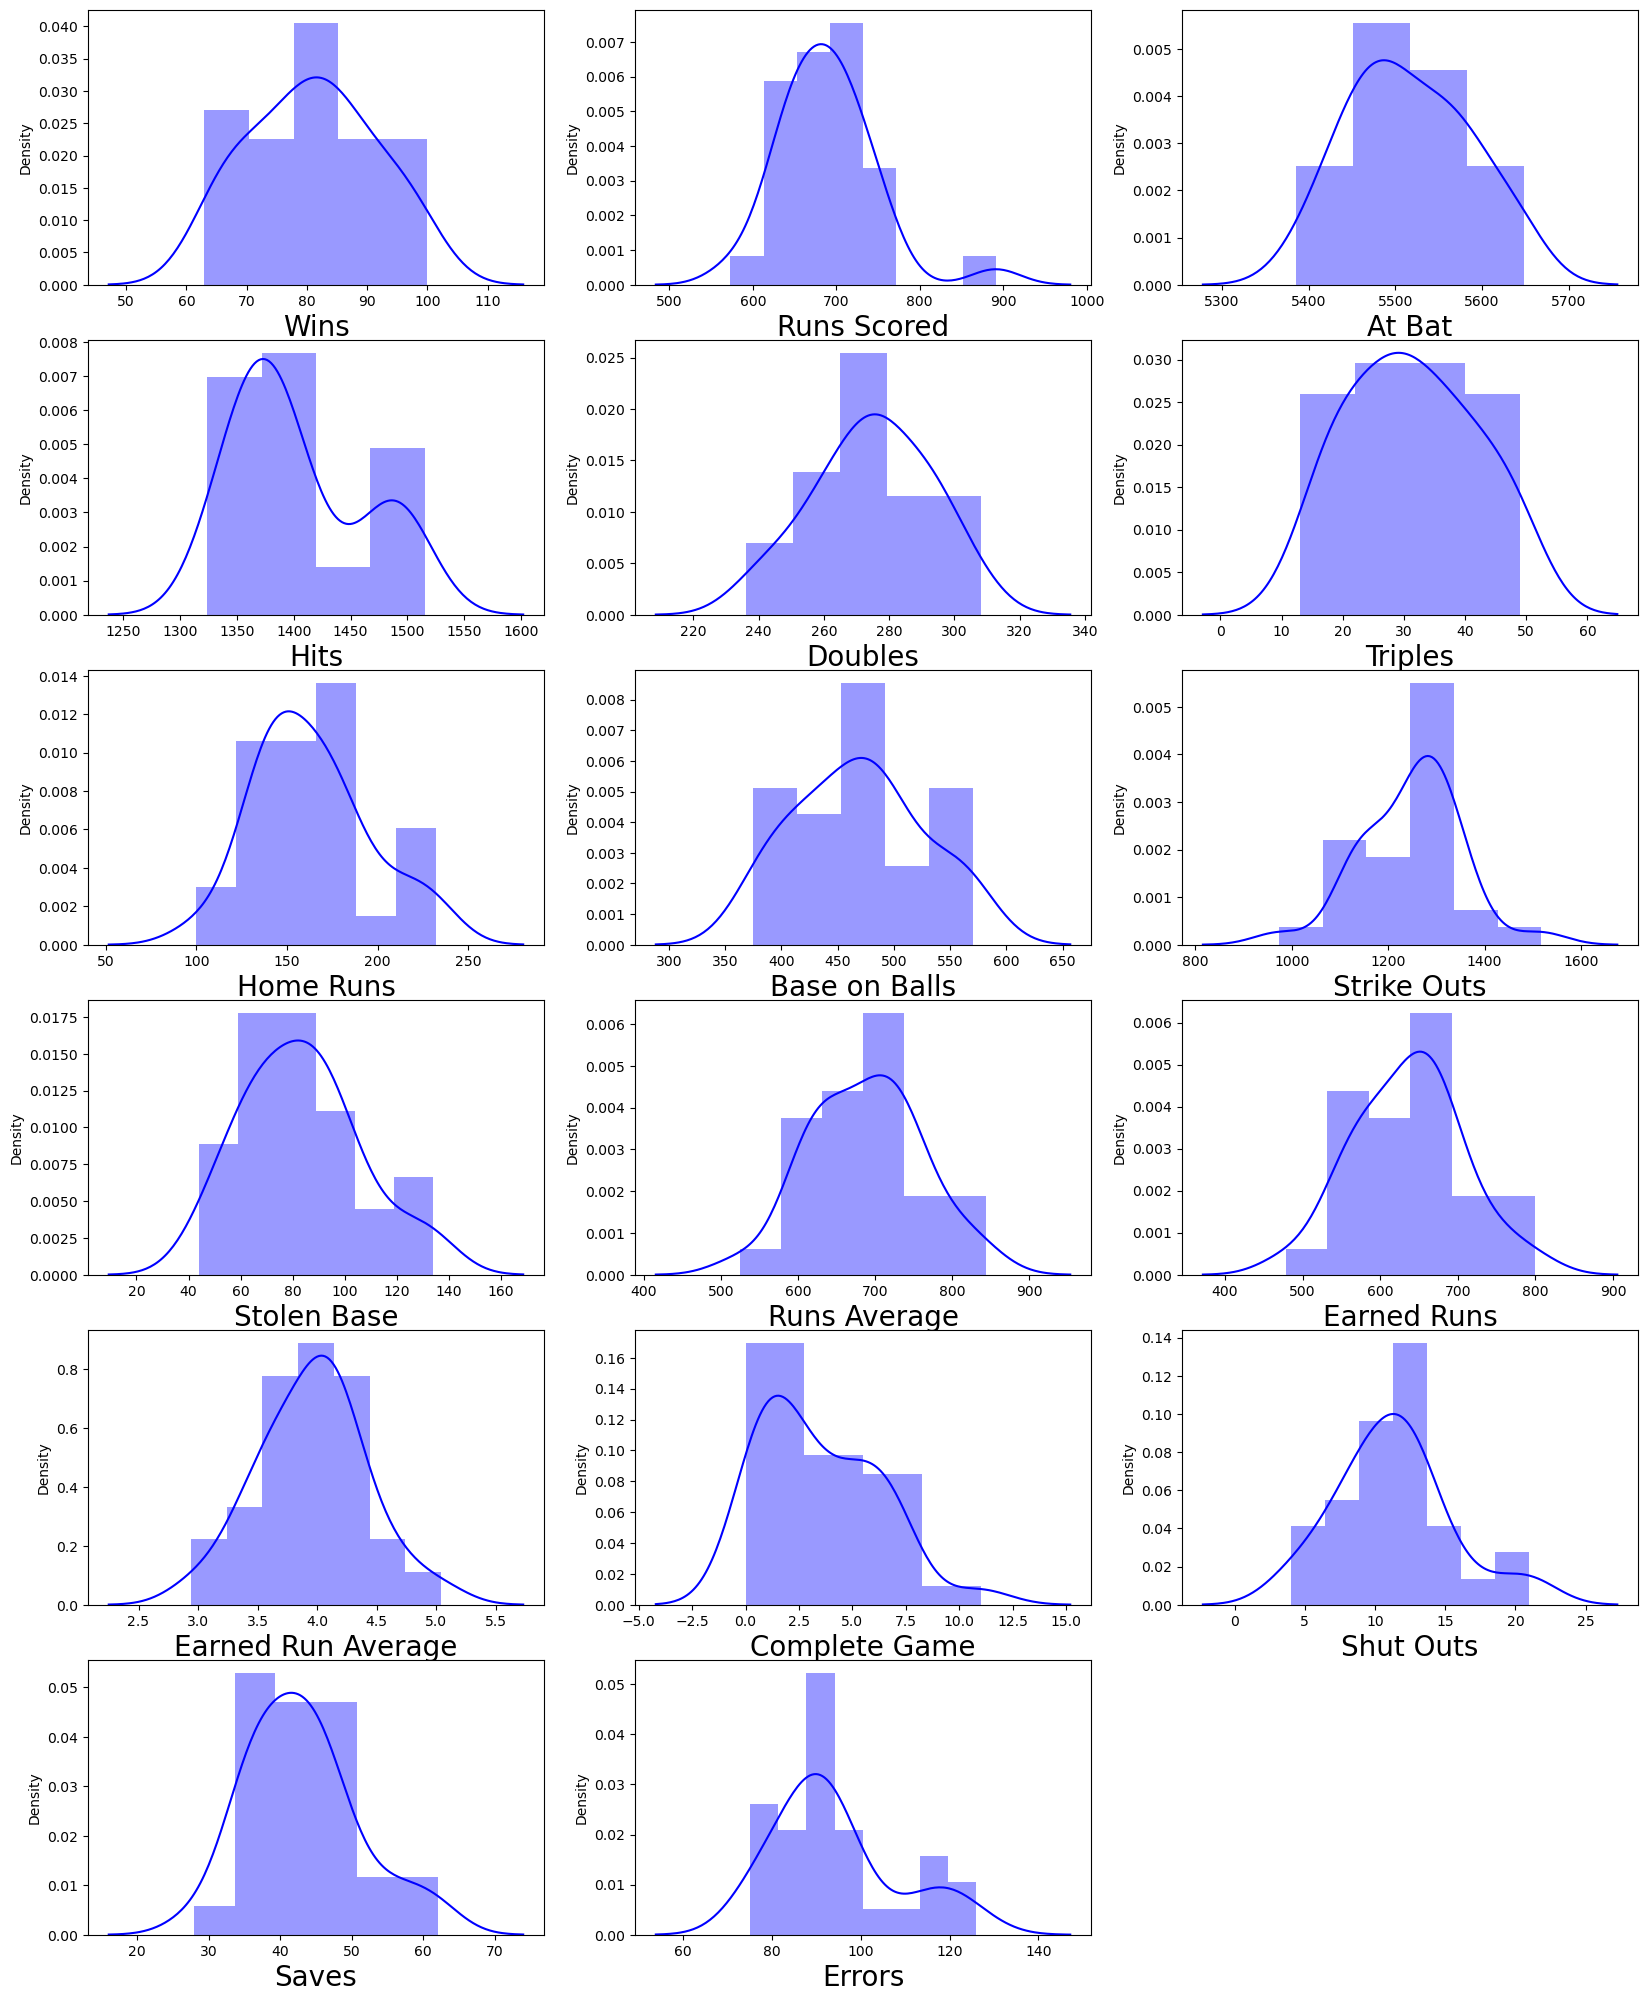

In [162]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=17:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(df[column], color='b',hist=True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

some  are either left or right skewed

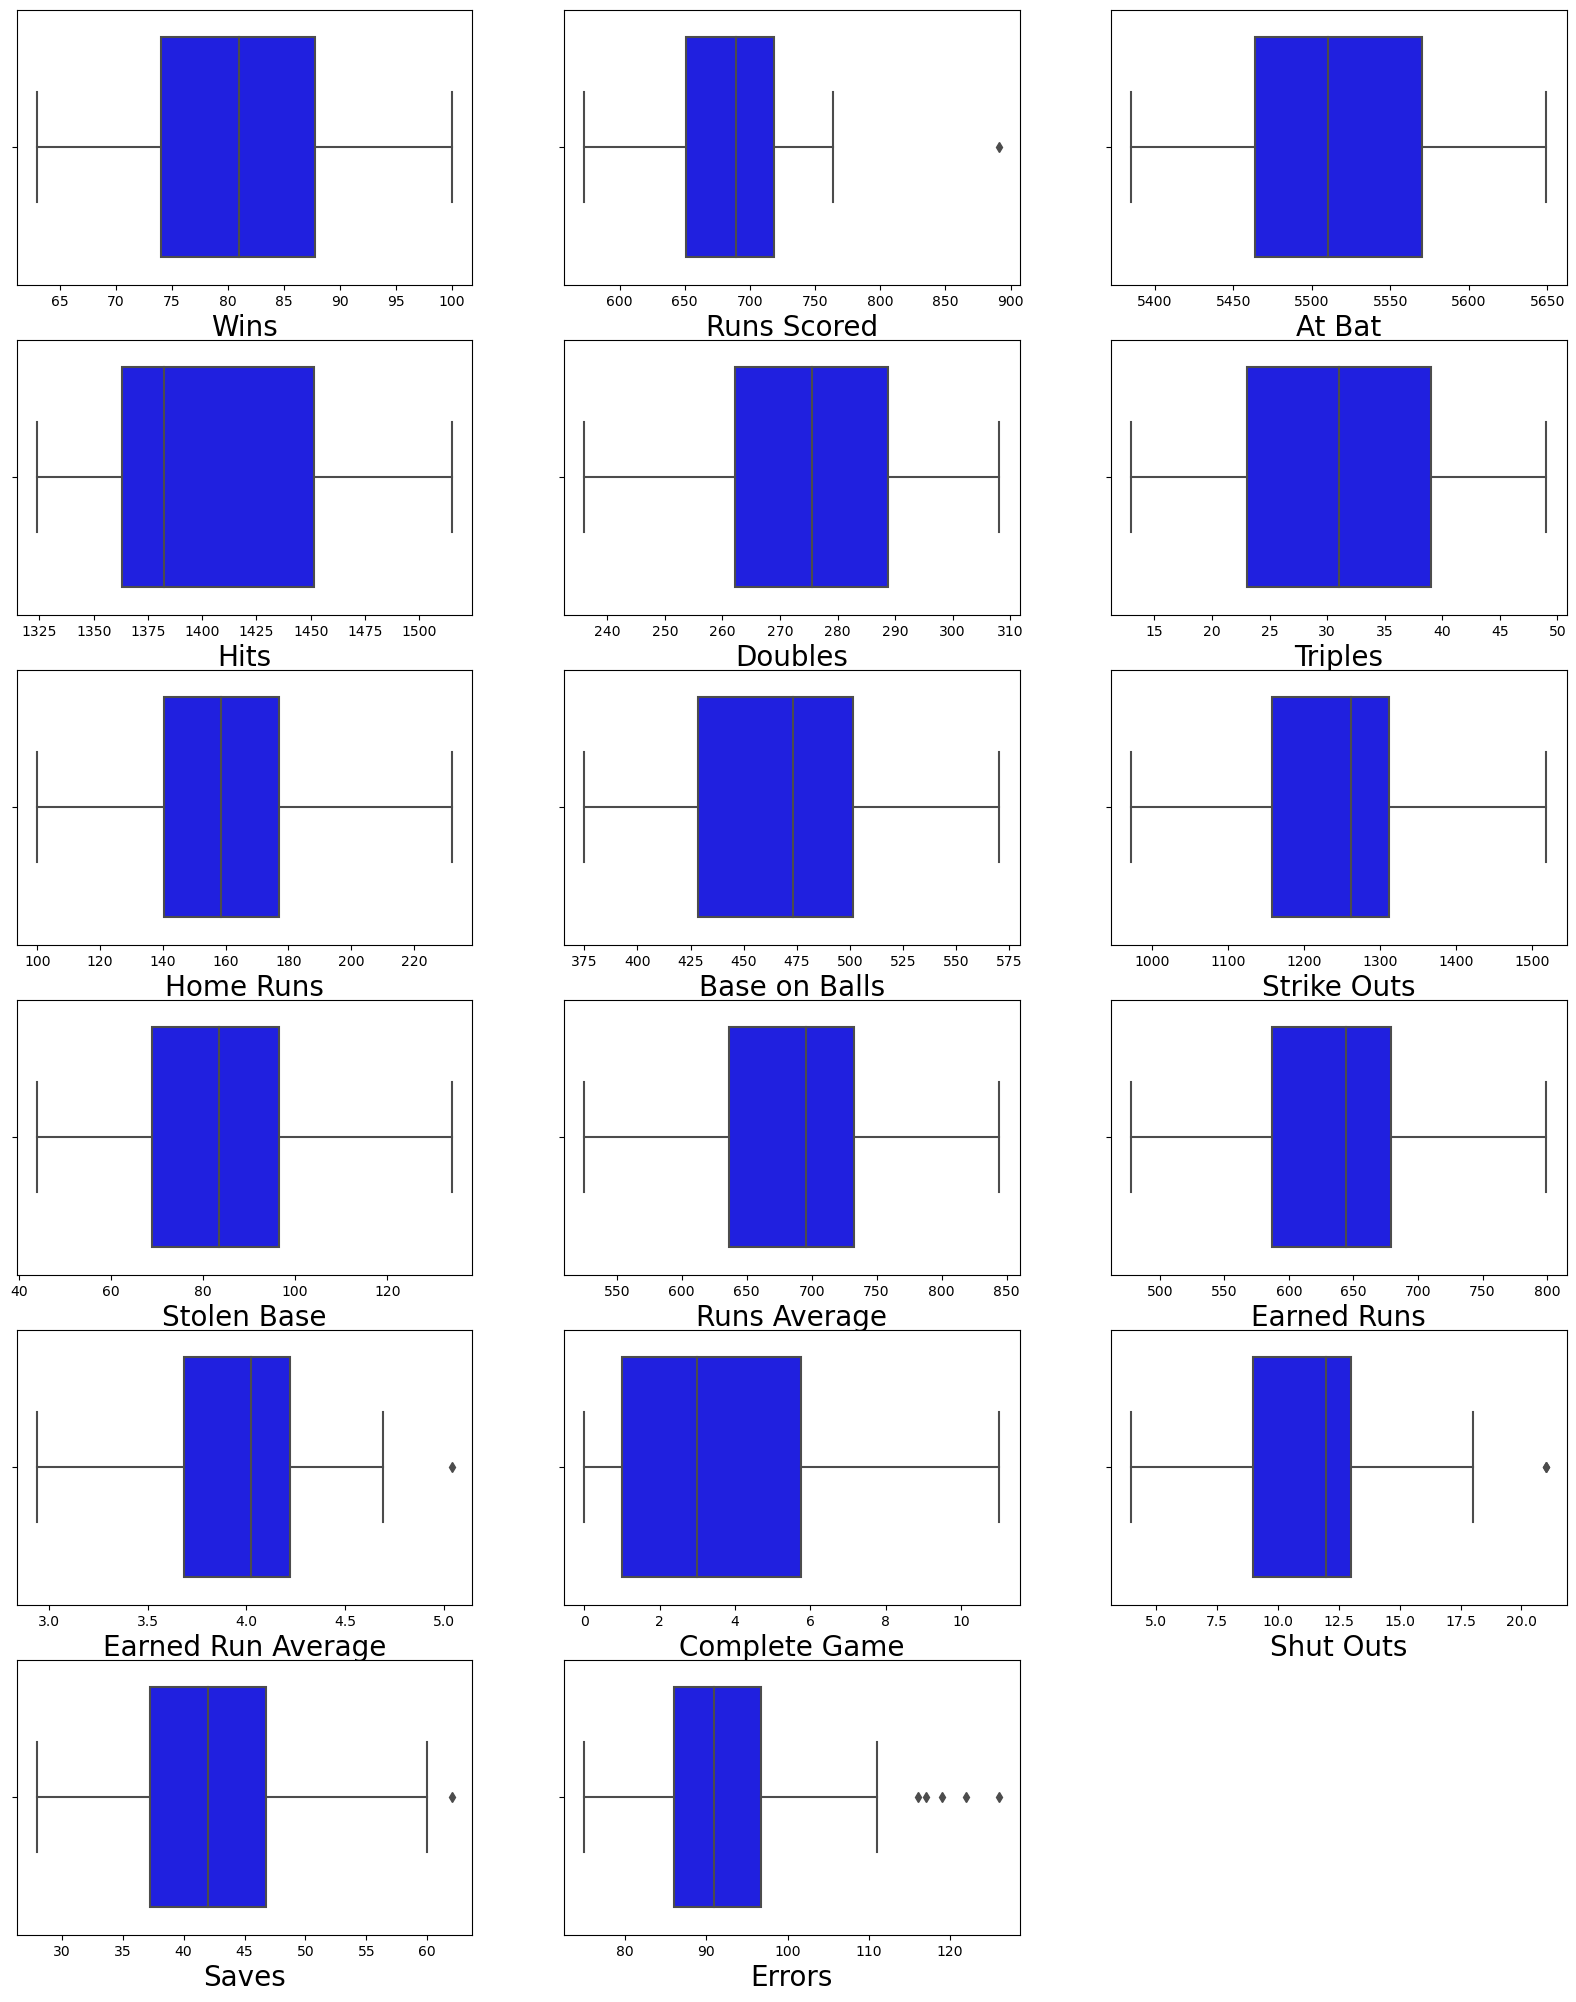

In [195]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=17:
        ax = plt.subplot(6,3,plotnumber)
        sns.boxplot(df[column], color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

Histogram

In [164]:
df['Wins'].mean()

80.96666666666667

In [194]:
df['Runs Scored'].max()

891

In [167]:
X=df.drop(columns='Wins',axis=1)
y=df['Wins']

In [168]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [170]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [173]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=42, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (21, 16)
Training target vector size: (21,)
Test feature matrix size: (9, 16)
Test target vector size: (9,)


Best random rate

In [175]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,250):
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=i, test_size=.25)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.9062313263733308 on Random_state 29


In [183]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=217, test_size=.25)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)

In [185]:
print('predict',y_pred)
print('actual',Y_test)

predict [ 77.72877794  82.39775899  87.04288207  68.20123355 110.28016301
  71.52370642  75.09937887  91.04570415]
actual 2      81
15    100
26     84
23     67
5      93
4      74
6      87
17     97
Name: Wins, dtype: int64


# best neighbors for KNN Regressor

In [187]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
val = [] 
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train,Y_train) 
    y_pred=model.predict(X_test)
    error = sqrt(mean_squared_error(Y_test,y_pred))
    val.append(error) 
    print('RMSE value for k= ' , K ,error)

RMSE value for k=  1 10.482127646618315
RMSE value for k=  2 9.25
RMSE value for k=  3 10.201443253013002
RMSE value for k=  4 11.317160642139882
RMSE value for k=  5 9.951884243699784
RMSE value for k=  6 9.002700212220281
RMSE value for k=  7 8.645808232895291
RMSE value for k=  8 8.483439750478576
RMSE value for k=  9 8.498456650009976
RMSE value for k=  10 8.504631091352522


In [197]:
#Saving model
import joblib
joblib.dump(model,'Baseball.pkl')

['Baseball.pkl']